In [1]:
import torch
import torch.nn.functional as F
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

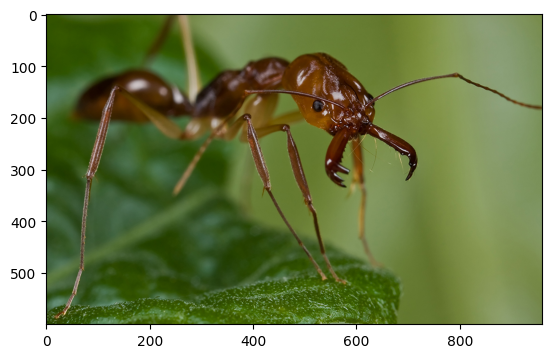

In [2]:
import requests
from PIL import Image

#url = 'http://www.edgeofexistence.org/wp-content/uploads/2017/06/Anilany-helenae_KMullin-1000x697.jpg'
url = 'http://s3.amazonaws.com/lab-notes-media/blog/wp-content/uploads/2017/05/top6-weirdants1.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
t_img = transform(img)
t_img = t_img.unsqueeze(0)

In [4]:
filters = [torch.tensor([[1., 2. , 1.], [0., 0., 0.], [-1., -2. , -1.]]),
           torch.tensor([[0., -1. , 0.], [-1., 4., -1.], [0., -1. , 0.]]),
           torch.tensor([[-1., -1. , -1.], [-1., 8., -1.], [-1., -1. , -1.]]),
           torch.tensor([[1., -2. , 1.], [-2., 4., -2.], [1., -2. , 1.]])
          ]

In [5]:
def display_image_applying_filter(img, grayscale=False):
    fig = plt.figure(figsize=(25, 6))
    for idx, filter in enumerate(filters, start=1):
        f = filter.expand(1, 3, 3, 3)
        f_img = F.conv2d(img, f, stride=1, padding=1)
        f_img = f_img.squeeze(0).squeeze(0)
        f_img = f_img.clone().detach().numpy()
        ax = fig.add_subplot(1, len(filters), idx)
        if grayscale:
            plt.imshow(f_img, cmap='Greys',  interpolation='nearest')
        else:
            plt.imshow(f_img)

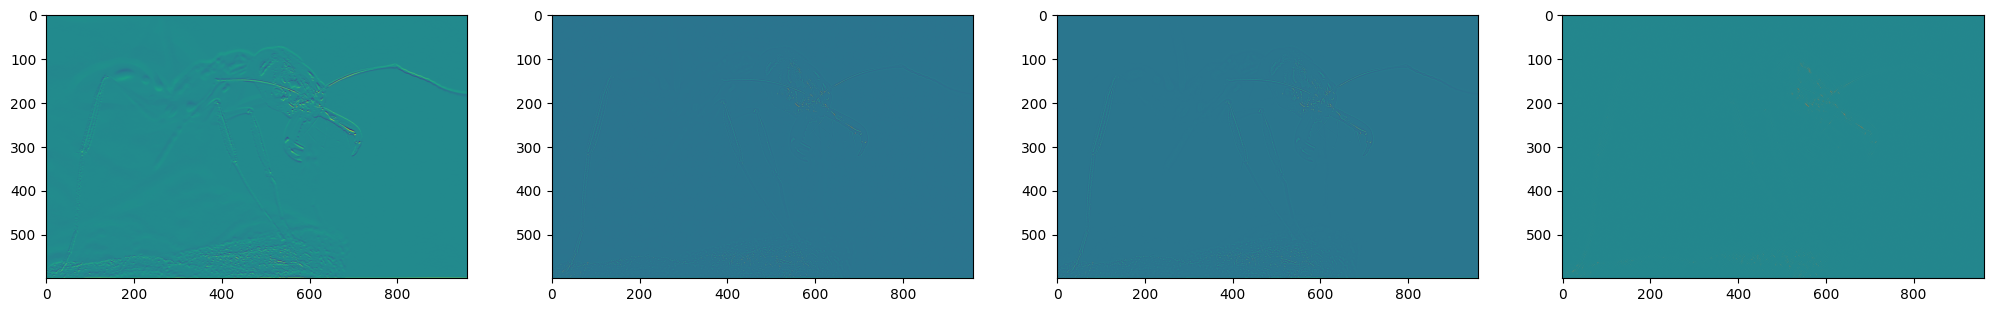

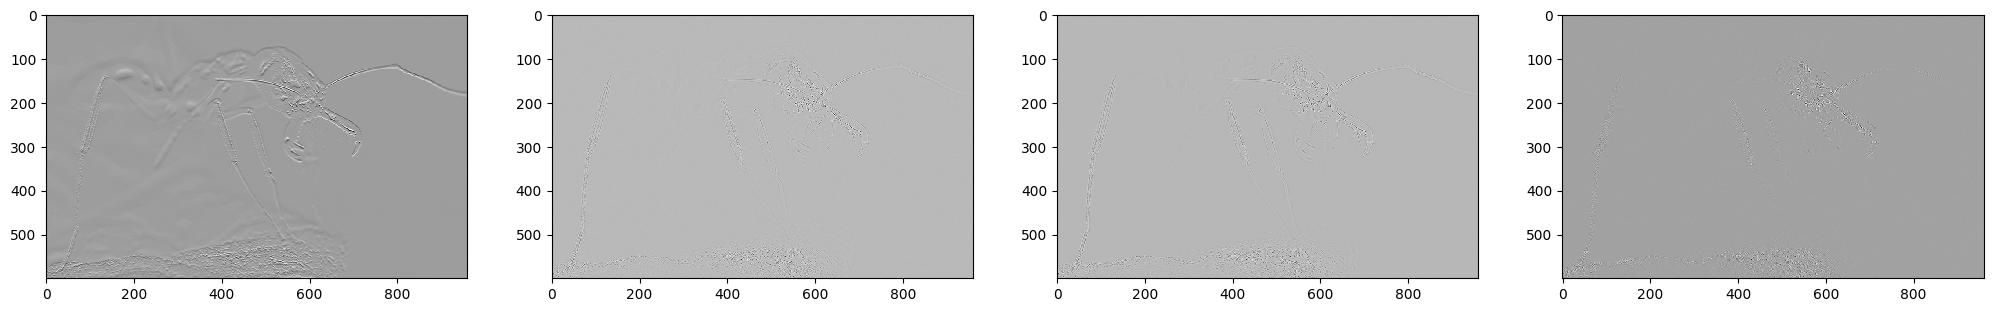

In [6]:
display_image_applying_filter(t_img)
display_image_applying_filter(t_img, grayscale=True)

In [7]:
def convolution2d(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

In [8]:
def display_image_applying_filter(np_image):
    fig, axs = plt.subplots(3, len(filters), figsize=(25, 10))
    for idx, f in enumerate(filters, start=0):
        r = convolution2d(np_image[:, :, 0], f.numpy(), 0)
        g = convolution2d(np_image[:, :, 1], f.numpy(), 0)
        b = convolution2d(np_image[:, :, 2], f.numpy(), 0)
        single_channel = r + g + b
        single_channel_cliped = r.clip(0, 255) + g.clip(0, 255) + b.clip(0, 255)
        f_img = np.dstack((r,g,b))
        axs[0, idx].imshow(f_img)
        axs[1, idx].imshow(single_channel)
        axs[2, idx].imshow(single_channel_cliped)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-904.0..940.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-424.0..717.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1014.0..1626.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-551.0..690.0].


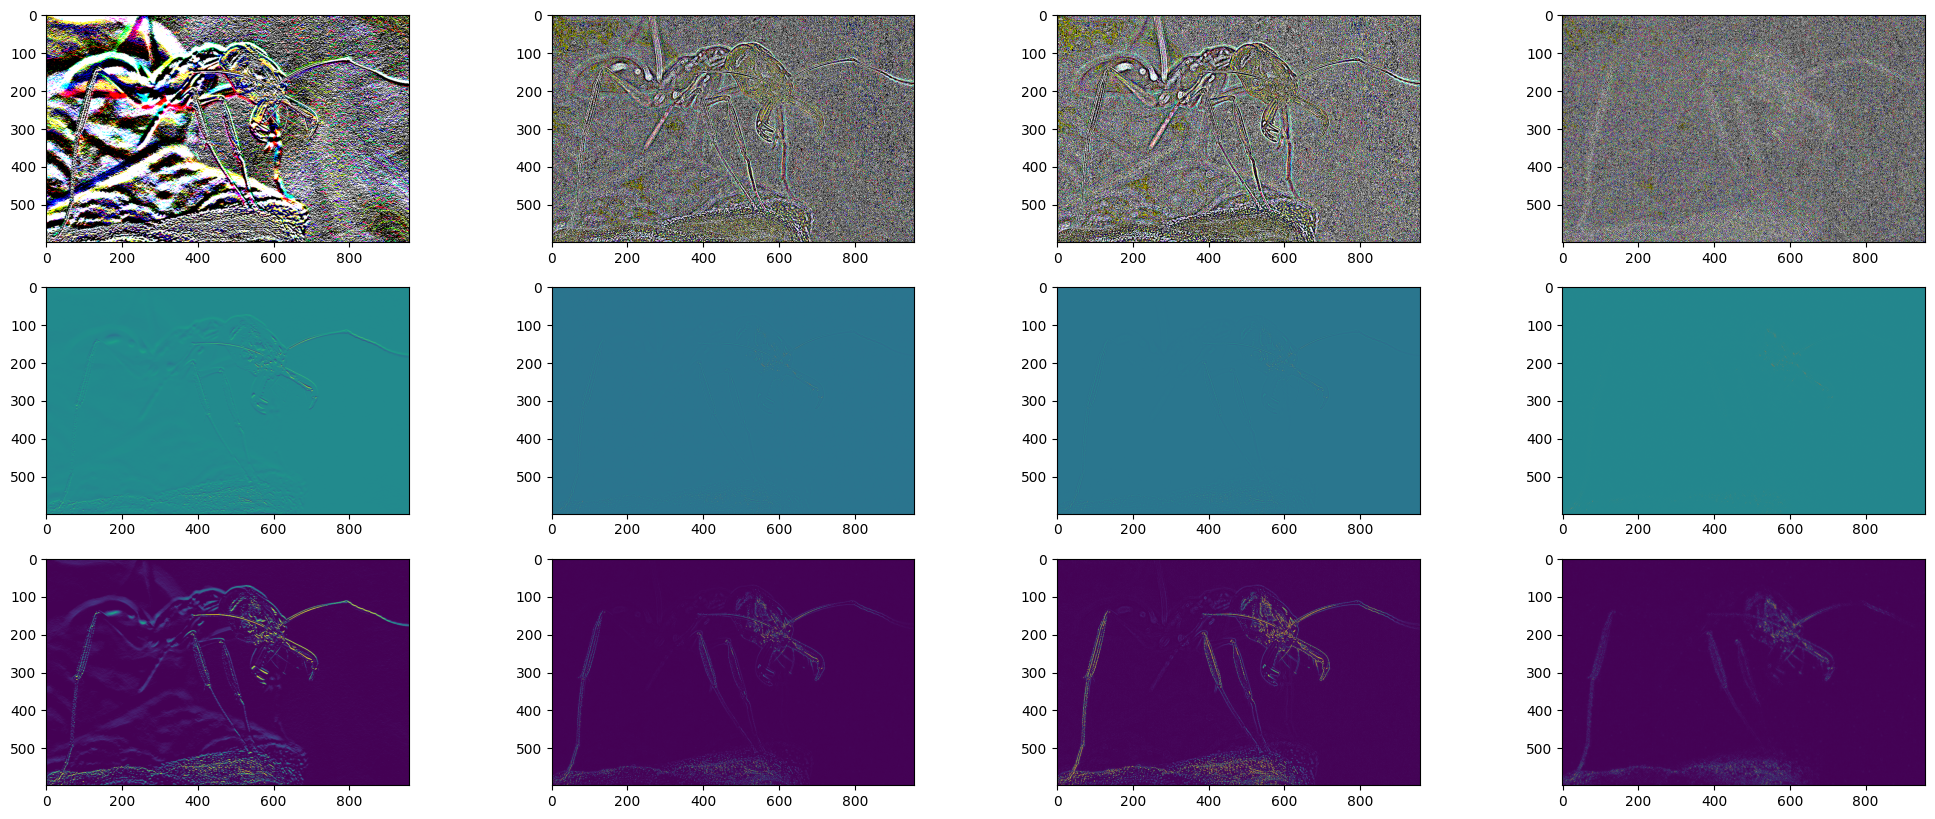

In [9]:
np_image = np.asarray(img, dtype="int32")
display_image_applying_filter(np_image)